## Following actions should be performed:
* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using xgboost 


### Importing the libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the datasets

In [78]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [79]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Separating y column from training set

In [80]:
y = df_train.pop('y')

In [81]:
y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [82]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


#### Info about datasets

In [83]:
print('df_train:',df_train.shape)
print('df_test :',df_test.shape)

df_train: (4209, 377)
df_test : (4209, 377)


In [84]:
print('df_train:',df_train.info(),'\n')
print('df_test :',df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB
df_train: None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB
df_test : None


Training set has 8 object

### Finding if any columns has variance which equals zero, removing if zero

In [85]:
df_train_var = df_train.var()

#### Narrowed down and found the columns which had variance which equaled to zero

In [86]:
df_train.var()[df_train_var<=0]

X11     0.0
X93     0.0
X107    0.0
X233    0.0
X235    0.0
X268    0.0
X289    0.0
X290    0.0
X293    0.0
X297    0.0
X330    0.0
X347    0.0
dtype: float64

#### Dropping the columns which had zero variance

In [87]:
df_train.drop(columns=['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'],inplace=True)

In [88]:
df_train.var()[df_train_var<=0]

Series([], dtype: float64)

In [89]:
# Dropping ID column
ID = df_train.pop('ID')
ID

0          0
1          6
2          7
3          9
4         13
        ... 
4204    8405
4205    8406
4206    8412
4207    8415
4208    8417
Name: ID, Length: 4209, dtype: int64

#### Checking for null in train and test datasets

In [90]:
df_train.isna().sum().any()

False

In [91]:
df_test.isna().sum().any()

False

#### Checking for unique in train and test datasets

In [92]:
print(df_train.apply(lambda col: col.unique()))

X0      [k, az, t, al, o, w, j, h, s, n, ay, f, x, y, ...
X1      [v, t, w, b, r, l, s, aa, c, a, e, h, z, j, o,...
X2      [at, av, n, e, as, aq, r, ai, ak, m, a, k, ae,...
X3                                  [a, e, c, f, d, b, g]
X4                                           [d, b, c, a]
                              ...                        
X380                                               [0, 1]
X382                                               [0, 1]
X383                                               [0, 1]
X384                                               [0, 1]
X385                                               [0, 1]
Length: 364, dtype: object


In [93]:
print(df_test.apply(lambda col: col.unique()))

ID      [1, 2, 3, 4, 5, 8, 10, 11, 12, 14, 15, 16, 17,...
X0      [az, t, w, y, x, f, ap, o, ay, al, h, z, aj, d...
X1      [v, b, l, s, aa, r, a, i, p, c, o, m, z, e, h,...
X2      [n, ai, as, ae, s, b, e, ak, m, a, aq, ag, r, ...
X3                                  [f, a, c, e, d, g, b]
                              ...                        
X380                                               [0, 1]
X382                                               [0, 1]
X383                                               [0, 1]
X384                                               [0, 1]
X385                                               [0, 1]
Length: 377, dtype: object


#### Applying label Encoder for categorical columns

##### Finding columns which have categoraical values

In [94]:
categorical_col = df_train.select_dtypes(include=['object']).columns

In [95]:
categorical_col

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

##### Applying LabelEncoding for the categorical columns

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le = LabelEncoder()

In [98]:
df_train['X0'] = le.fit_transform(df_train.X0)
df_train['X1'] = le.fit_transform(df_train.X1)
df_train['X2'] = le.fit_transform(df_train.X2)
df_train['X3'] = le.fit_transform(df_train.X3)
df_train['X4'] = le.fit_transform(df_train.X4)
df_train['X5'] = le.fit_transform(df_train.X5)
df_train['X6'] = le.fit_transform(df_train.X6)
df_train['X8'] = le.fit_transform(df_train.X8)

In [99]:
df_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_train.shape

(4209, 364)

In [101]:
y = y.values

In [102]:
y = y.reshape(len(y),1)

In [103]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 364 entries, X0 to X385
dtypes: int32(8), int64(356)
memory usage: 11.6 MB
None


#### Performing Dimensionality Reduction

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca = PCA(n_components = 0.95)

In [106]:
pca.fit(df_train,y)

PCA(n_components=0.95)

In [107]:
df_train_trans = pca.transform(df_train)

In [108]:
df_train_trans.shape

(4209, 6)

### Predicting values with xgboost

#### Importing the required libraries

In [109]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

#### Splitting the data into training and testing set

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df_train_trans,y, test_size=0.3)

In [111]:
print('\n','X_train:',X_train.shape, '\n','X_test:',X_test.shape,
      '\n','y_train:',y_train.shape, '\n', 'y_test:',y_test.shape)


 X_train: (2946, 6) 
 X_test: (1263, 6) 
 y_train: (2946, 1) 
 y_test: (1263, 1)


In [112]:
xgb_regress = xgb.XGBRegressor(objective='reg:linear' ,n_estimator = 1000)

In [113]:
xgb_regress.fit(X_train,y_train)

[22:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimator=1000, n_estimators=100,
             n_jobs=4, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Calculating Mean Squared error

In [114]:
print('RMSE = ', sqrt(mean_squared_error(xgb_regress.predict(X_test),y_test)))

RMSE =  10.229033253529476


In [115]:
y_pred = xgb_regress.predict(X_test)

In [116]:
y_pred.shape

(1263,)

#### Plotting a distribution plot for y_test and y_pred

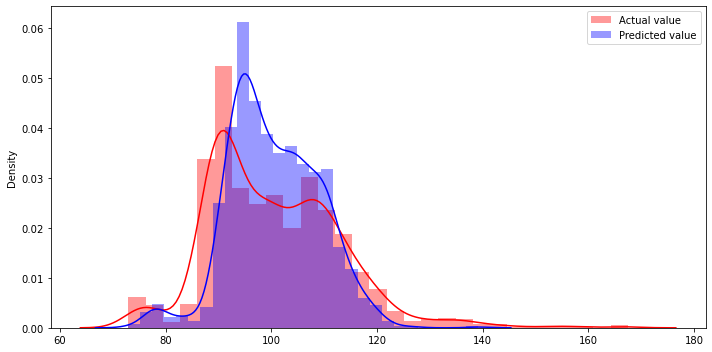

In [117]:
plt.figure(figsize=(10,5))

sns.distplot(y_test, color="red", label="Actual value")
sns.distplot(y_pred , color="blue", label="Predicted value")
plt.legend()

plt.tight_layout()

### Predicting test set

#### Checking for null values

In [118]:
df_test.isna().any().sum()

0

In [119]:
df_test.shape

(4209, 377)

In [120]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


##### Preprocessing the data for prediction

In [121]:
test_ID = df_test.pop('ID')

In [122]:
df_test.select_dtypes(include='object').columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [123]:
df_test['X0'] = le.fit_transform(df_test['X0'])
df_test['X1'] = le.fit_transform(df_test['X1'])
df_test['X2'] = le.fit_transform(df_test['X2'])
df_test['X3'] = le.fit_transform(df_test['X3'])
df_test['X4'] = le.fit_transform(df_test['X4'])
df_test['X5'] = le.fit_transform(df_test['X5'])
df_test['X6'] = le.fit_transform(df_test['X6'])
df_test['X8'] = le.fit_transform(df_test['X8'])

In [124]:
df_test.select_dtypes(include='object').columns

Index([], dtype='object')

In [125]:
df_test.drop(columns=['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'],inplace=True)

In [126]:
df_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [127]:
pca.fit(df_test)

PCA(n_components=0.95)

In [128]:
df_test_trans = pca.fit_transform(df_test)

In [129]:
df_test_trans.shape

(4209, 6)

In [130]:
test_pred = xgb_regress.predict(df_test_trans)

In [131]:
test_pred.shape

(4209,)

#### Plotting the distribution plot for y_test and test_pred

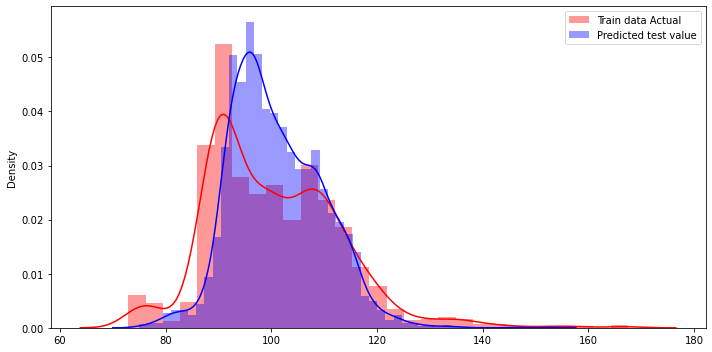

In [132]:
plt.figure(figsize=(10,5))

sns.distplot(y_test, color="red", label="Train data Actual")
sns.distplot(test_pred, color="blue", label="Predicted test value")
plt.legend()

plt.tight_layout()

#### Making use of whole train data and predicting test data

In [133]:
xgb_regress.fit(df_train_trans,y)

[22:25:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimator=1000, n_estimators=100,
             n_jobs=4, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [134]:
df_test_pred_full = xgb_regress.predict(df_test_trans)

#### Calculating Mse for train and test

In [135]:
sqrt(mean_squared_error(y,df_test_pred_full))

15.170848187406504

#### PLotting distribution plot fro train and test

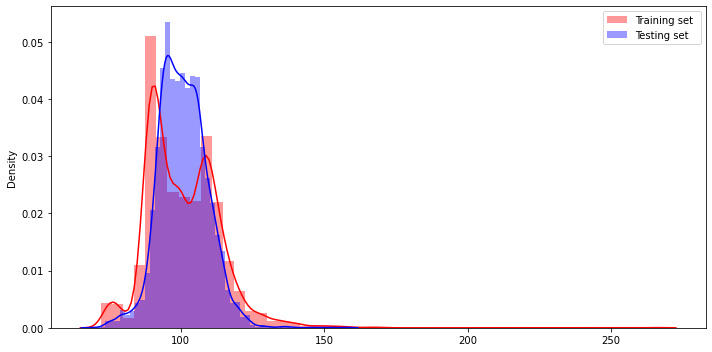

In [136]:
plt.figure(figsize=(10,5))

sns.distplot(y, color="red", label="Training set ")
sns.distplot(df_test_pred_full, color="blue", label="Testing set")
plt.legend()

plt.tight_layout()

In [137]:
df_test_pred_full

array([ 74.01814 ,  91.05353 , 100.688675, ...,  95.88404 , 104.61238 ,
        95.24522 ], dtype=float32)